In [1]:
# togo_eda.ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Read data
df = pd.read_csv("../data/togo_dapaong_qc.csv", parse_dates=["Timestamp"])

# Preview
display(df.head())
display(df.info())

# Summary statistics
display(df.describe())

# Missing values
missing_report = df.isna().sum().to_frame("missing_count")
missing_report["missing_%"] = (missing_report["missing_count"] / len(df)) * 100
display(missing_report[missing_report["missing_%"] > 5])


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       525600 non-null  int64         
 15  

None

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,2022-04-25 12:00:30.000000768,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
min,2021-10-25 00:01:00,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,2022-01-24 06:00:45,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2022-04-25 12:00:30,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,2022-07-25 18:00:15,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,2022-10-25 00:00:00,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN
std,NaN,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN


,missing_count,missing_%
Comments,525600,100.0


Outlier Detection (Z-score Method)

In [2]:
cols_to_check = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]

z_scores = np.abs(stats.zscore(df[cols_to_check].select_dtypes(np.number), nan_policy='omit'))
outliers = (z_scores > 3).sum()
print(outliers)

df_clean = df.copy()
for col in cols_to_check:
    df_clean[col] = np.where(np.abs(stats.zscore(df_clean[col], nan_policy='omit')) > 3,
                             np.nan, df_clean[col])

df_clean.fillna(df_clean.median(numeric_only=True), inplace=True)

df_clean.to_csv("../data/togo_clean.csv", index=False)


12550


EDA Visualizations
A. Time Series Plots

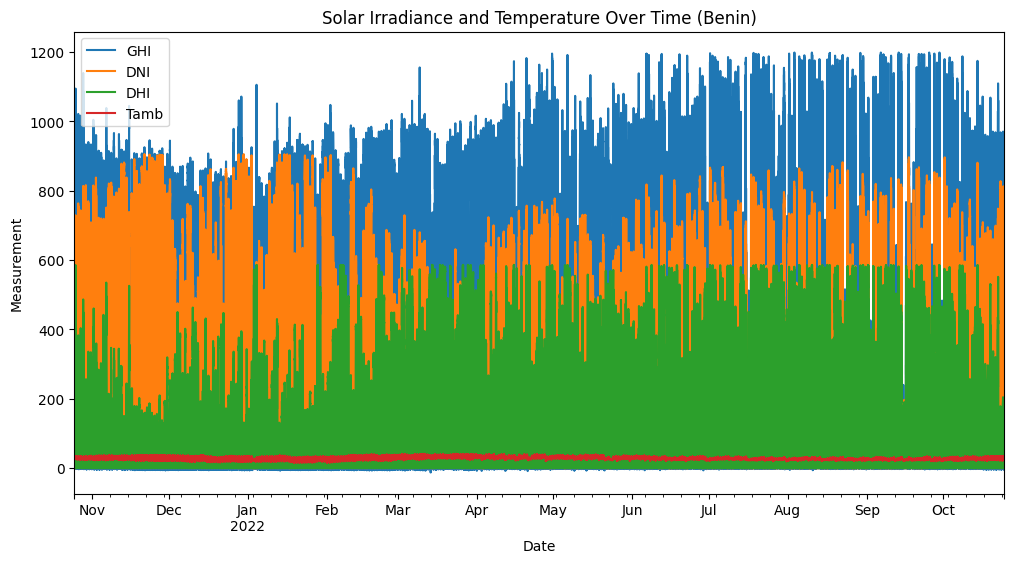

In [3]:
df_clean.set_index("Timestamp")[["GHI", "DNI", "DHI", "Tamb"]].plot(figsize=(12,6))
plt.title("Solar Irradiance and Temperature Over Time (Benin)")
plt.xlabel("Date")
plt.ylabel("Measurement")
plt.show()

B. Cleaning Impact

<Axes: title={'center': 'Average ModA & ModB Pre/Post Cleaning'}, xlabel='Cleaning'>

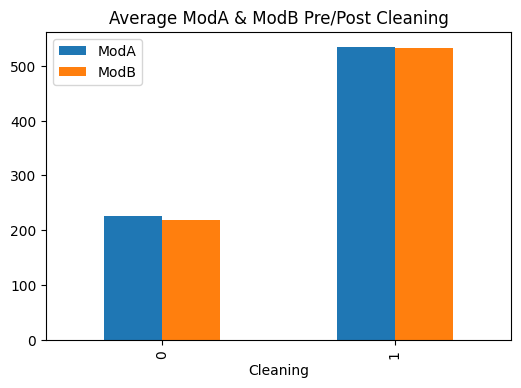

In [4]:
clean_avg = df_clean.groupby("Cleaning")[["ModA", "ModB"]].mean()
clean_avg.plot(kind="bar", title="Average ModA & ModB Pre/Post Cleaning", figsize=(6,4))


C. Correlation Heatmap

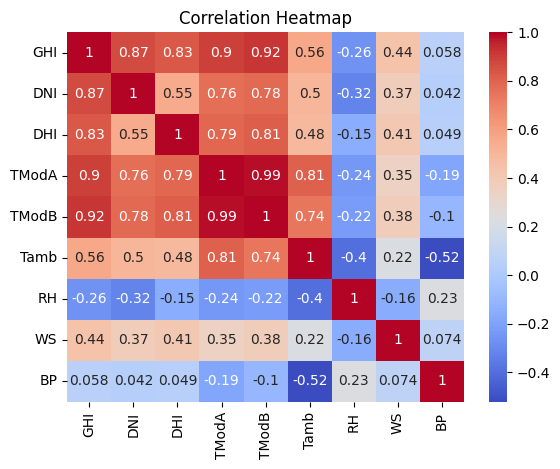

In [5]:
corr_cols = ["GHI", "DNI", "DHI", "TModA", "TModB", "Tamb", "RH", "WS", "BP"]
sns.heatmap(df_clean[corr_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


D. Scatter & Bubble Plots

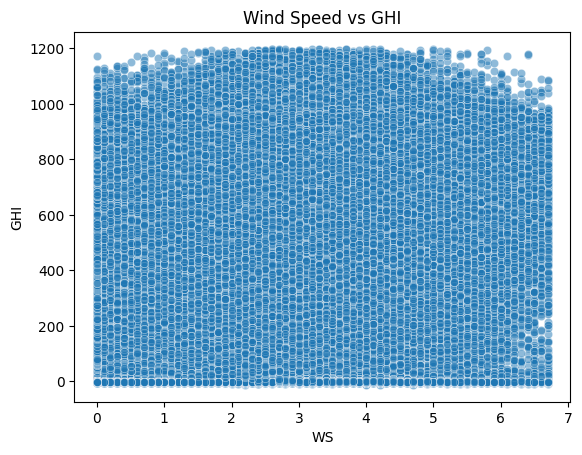

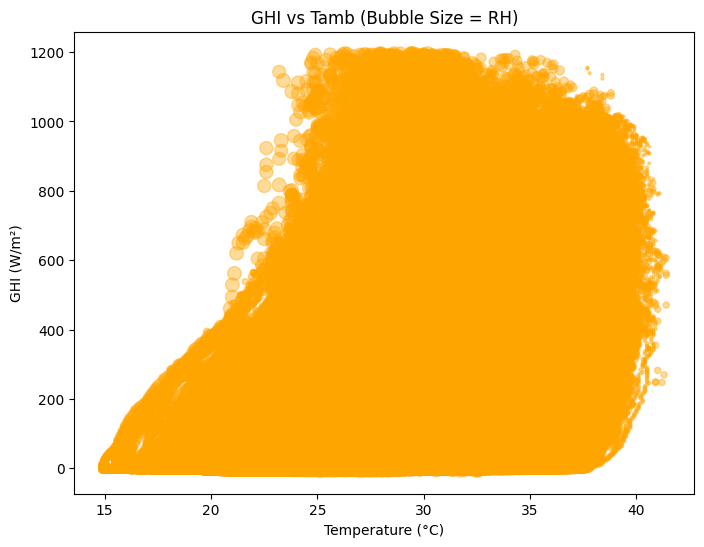

In [6]:
sns.scatterplot(data=df_clean, x="WS", y="GHI", alpha=0.5)
plt.title("Wind Speed vs GHI")

plt.figure(figsize=(8,6))
plt.scatter(df_clean["Tamb"], df_clean["GHI"],
            s=df_clean["RH"], alpha=0.4, c="orange")
plt.title("GHI vs Tamb (Bubble Size = RH)")
plt.xlabel("Temperature (°C)")
plt.ylabel("GHI (W/m²)")
plt.show()


E. Distributions & Wind Rose

Text(0.5, 1.0, 'Wind Speed Distribution')

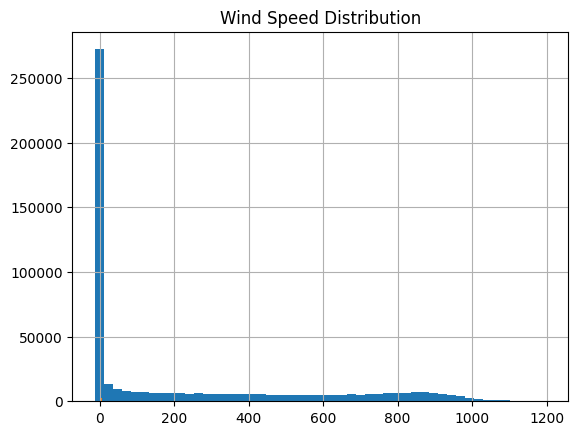

In [7]:
df_clean["GHI"].hist(bins=50)
plt.title("GHI Distribution")

df_clean["WS"].hist(bins=50)
plt.title("Wind Speed Distribution")
